In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import display
import numpy as np
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
%matplotlib inline

In [3]:
import os
import sys
import json
import time
import numpy as np
from random import shuffle

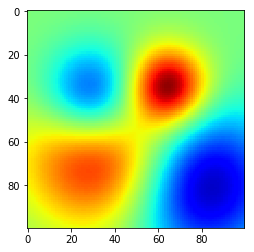

In [4]:
# generate a toy 2D regression dataset
sz = 100
X,Y = np.meshgrid(np.linspace(-1,1,sz),np.linspace(-1,1,sz))
mux,muy,sigma=0.3,-0.3,4
G1 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=-0.3,0.3,2
G2 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=0.6,0.6,2
G3 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=-0.4,-0.2,3
G4 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
G = G1 + G2 - G3 - G4
fig,ax = plt.subplots()
im = ax.imshow(G, vmin=-1, vmax=1, cmap='jet')
#plt.axis('off')

[66.56864877 70.63922336] 3 0.03
[62.88712511 66.61488007] 3 0.03
[59.43034234 62.4782423 ] 3 0.03
[54.98166799 58.63241804] 3 0.03
[49.76052305 56.99654109] 3 0.03
[44.38278877 58.1875065 ] 3 0.03
[39.5034137  60.80190123] 3 0.03
[35.41982213 64.12750642] 3 0.03
[34.94618227 65.13746502] 3 0.03
[33.07100856 64.23044003] 3 0.03


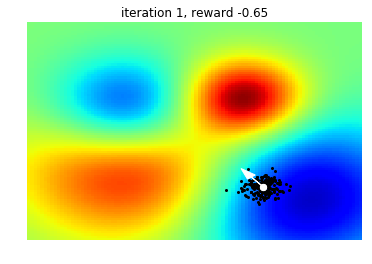

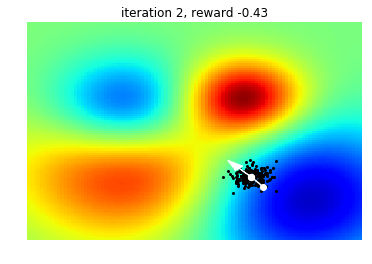

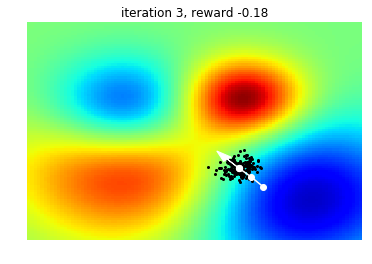

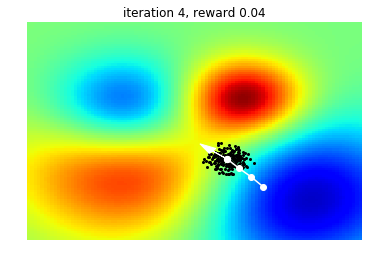

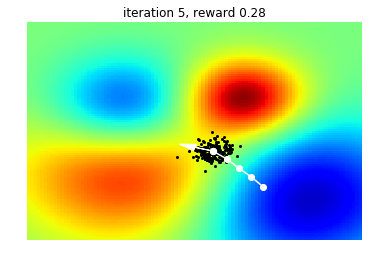

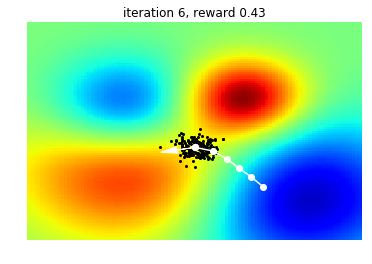

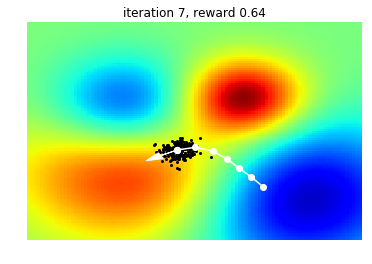

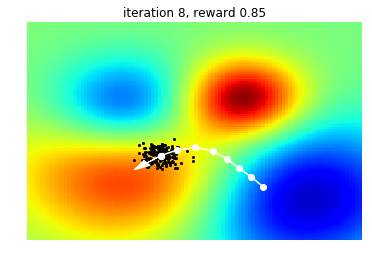

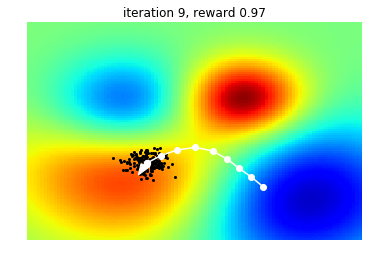

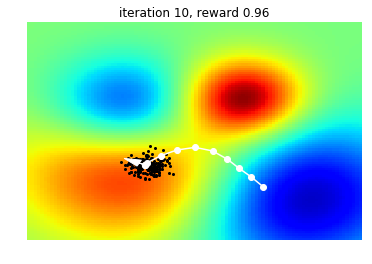

In [17]:
np.random.seed(6)
nn = 10 # number of steps to take (and plot horizontally)
init_alpha=alpha= 0.03 # learning rate
init_sigma=sigma = 3 # standard deviation of the samples around current parameter vector

w = [70.0, 75.0] # start point
plt.figure(figsize=(nn*2,nn))

prevx, prevy = [], []
no_rows=int(nn/4)+1
gs = gridspec.GridSpec(no_rows,4)
i=0
for q in range(nn):
    
    # draw the optimization landscape
    fig=plt.figure()
    ax=plt.gca()
    i += 1
    if i==4:
        i=0
    ax.imshow(G, vmin=-1, vmax=1, cmap='jet')
    
    # draw a population of samples in black
    noise = np.random.randn(200, 2)
    wp = np.expand_dims(w, 0) + sigma*noise
    x,y = zip(*wp)
    ax.scatter(x,y,4,'k', edgecolors='face')

    # draw the current parameter vector in white
    ax.scatter([w[0]],[w[1]],40,'w', edgecolors='face')

    # draw estimated gradient as white arrow
    R = np.array([G[int(wi[0]), int(wi[1])] for wi in wp])
    R -= R.mean()
    R /= R.std() # standardize the rewards to be N(0,1) gaussian
    g = np.dot(R, noise)
    u = alpha * g
    ax.arrow(w[0], w[1], u[0], u[1], head_width=3, head_length=5, fc='w', ec='w')
    ax.axis('off')
    plt.title('iteration %d, reward %.2f' % (q+1, G[int(w[0]), int(w[1])]))
    
    # draw the history of optimization as a white line
    prevx.append(w[0])
    prevy.append(w[1])
    if len(prevx) > 0:
        ax.plot(prevx, prevy, 'wo-')
    

    fig.savefig(f"derp_{q}.pdf",bbox_inches='tight')
    w += u
    print(w,sigma,alpha)
    ax.axis('tight')
#     psi_reward = -G[int(w[0]),int(w[1])]*8
#     sigma = min(5,init_sigma * -psi_reward)
#     alpha = min(0.03,init_alpha * -psi_reward)
    
#plt.savefig('evo.png',bbox_inches='tight',pad_inches=0,dpi=200)